In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url ="https://raw.githubusercontent.com/gaurav9909/Machine_Learning_Projects/refs/heads/main/Customer_Segmentation/mall_customers.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.size

1000

In [7]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [8]:
df.isna().sum()

,0
customer_id,0
gender,0
age,0
annual_income,0
spending_score,0


<Axes: >

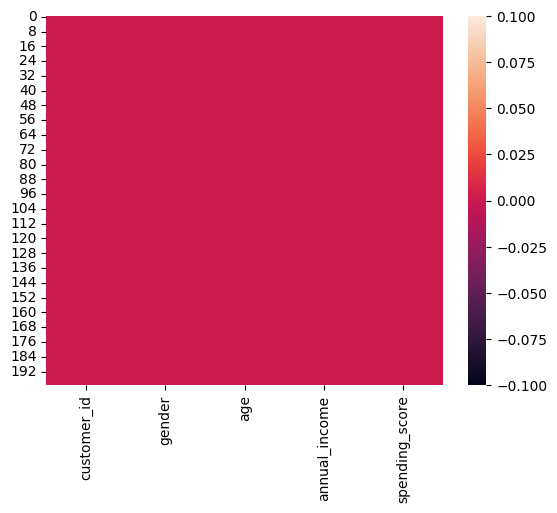

In [9]:
sns.heatmap(df.isnull())
#

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [12]:
df.drop('customer_id',axis=1,inplace=True)

In [13]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
for i in df.columns:
  print(df[i].value_counts())

gender
Female    112
Male       88
Name: count, dtype: int64
age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64
annual_income
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64
spending_score
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64


In [15]:
for i in df.columns:
  print(df[i].unique())

['Male' 'Female']
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


In [16]:
catg_col = df.select_dtypes(include='object').columns
print(catg_col)
cont_col = df.select_dtypes(exclude='object').columns
print(cont_col)

Index(['gender'], dtype='object')
Index(['age', 'annual_income', 'spending_score'], dtype='object')


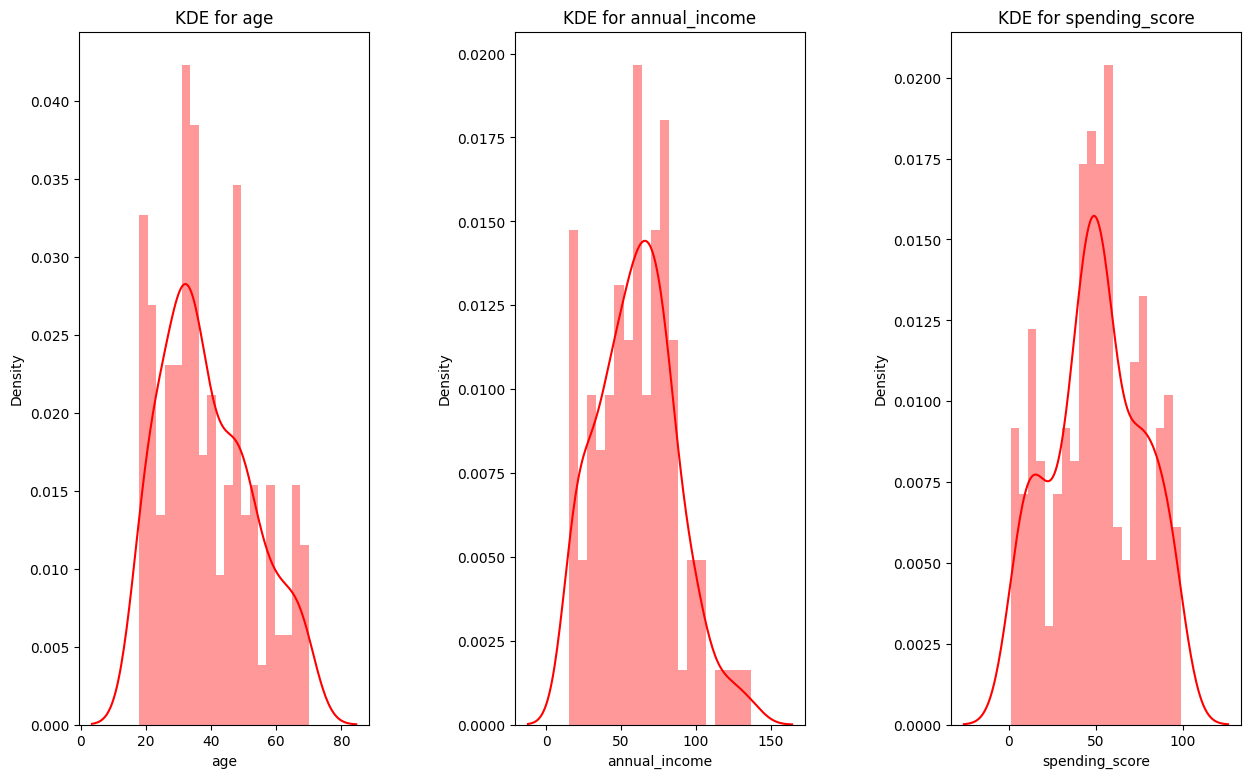

In [17]:
plt.figure(figsize=(15, 9))
n=0
for x in ['age','annual_income','spending_score']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(df[x],color='red',bins=20)
  plt.title('KDE for {}'.format(x))
plt.show()

<Figure size 1500x900 with 0 Axes>

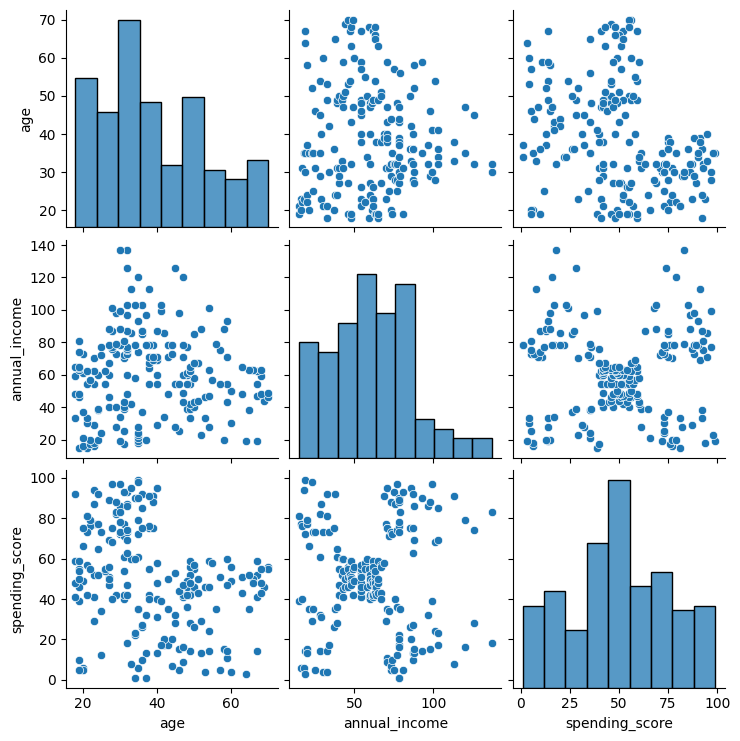

In [18]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(15, 9))
sns.pairplot(df)
plt.show()


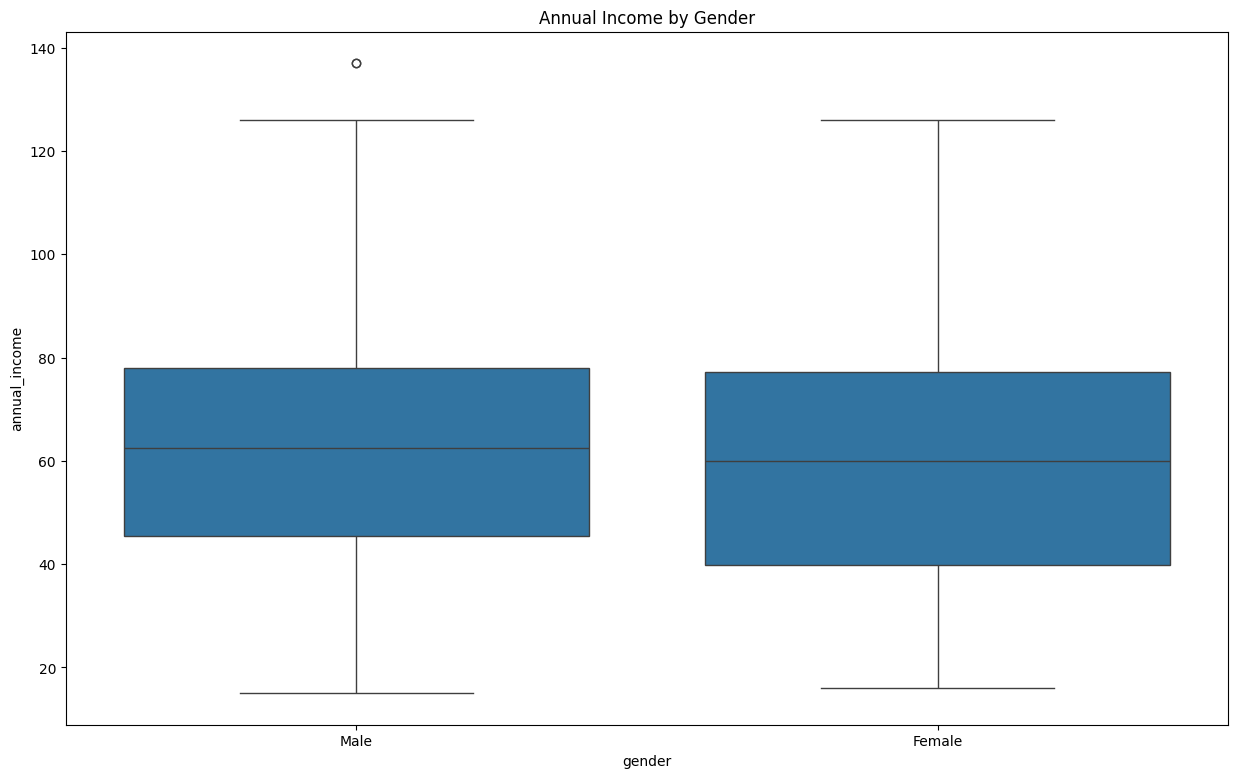

In [19]:
# Boxplot to visualize the distribution of features by gender
plt.figure(figsize=(15, 9))
sns.boxplot(x='gender', y='annual_income', data=df)
plt.title('Annual Income by Gender')
plt.show()

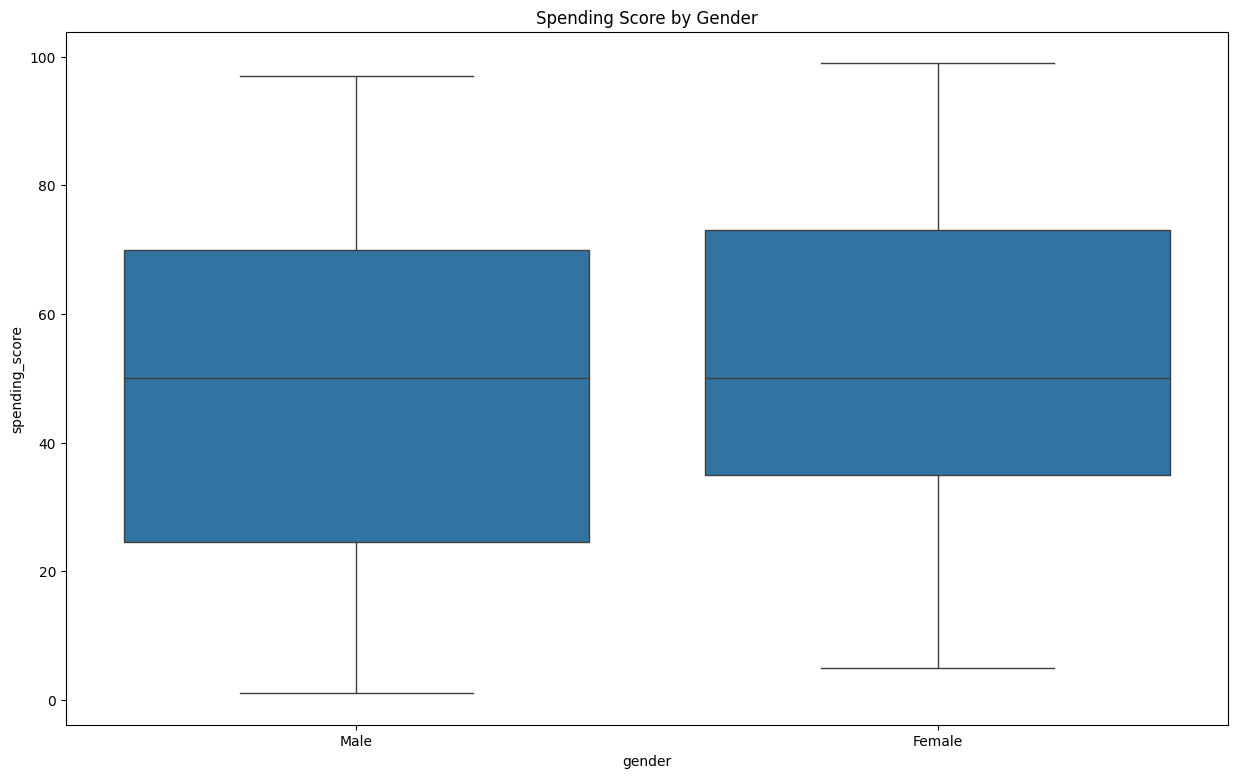

In [20]:
plt.figure(figsize=(15, 9))
sns.boxplot(x='gender', y='spending_score', data=df)
plt.title('Spending Score by Gender')
plt.show()

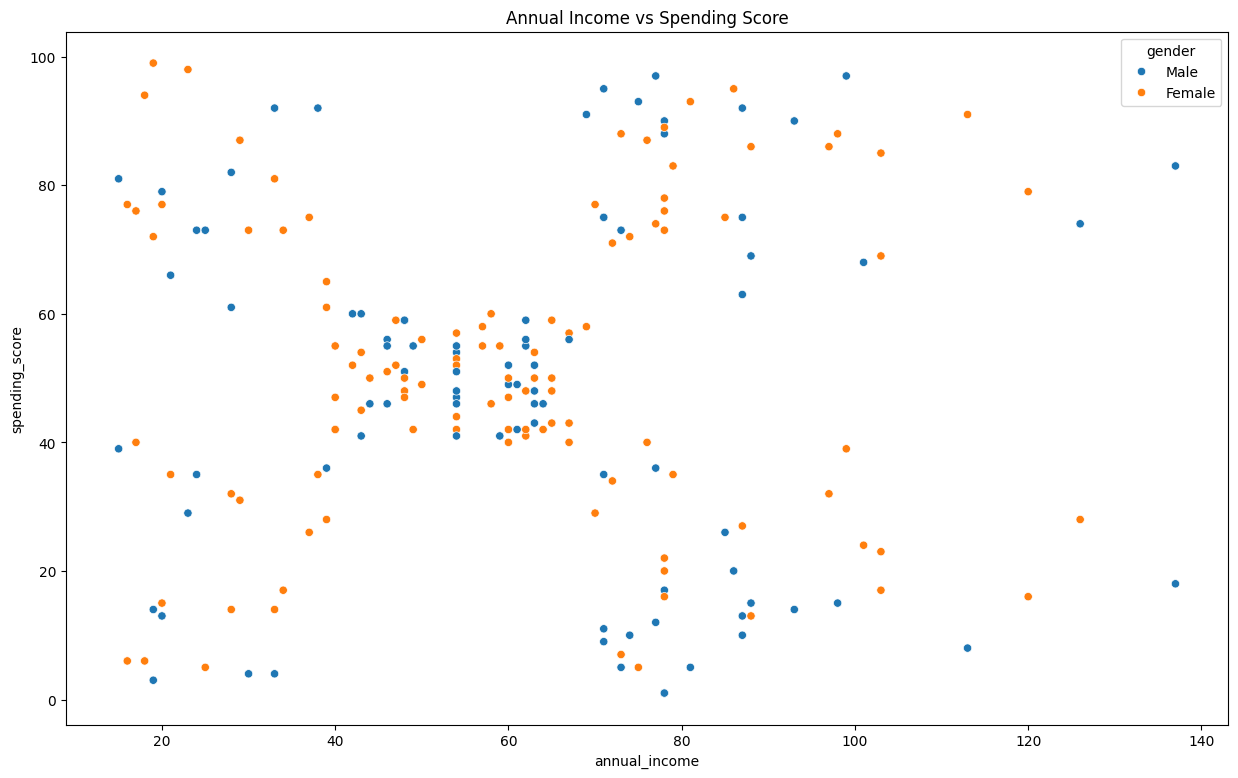

In [21]:
# Scatter plot to visualize the relationship between annual income and spending score
plt.figure(figsize=(15, 9))
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue='gender')
plt.title('Annual Income vs Spending Score')
plt.show()

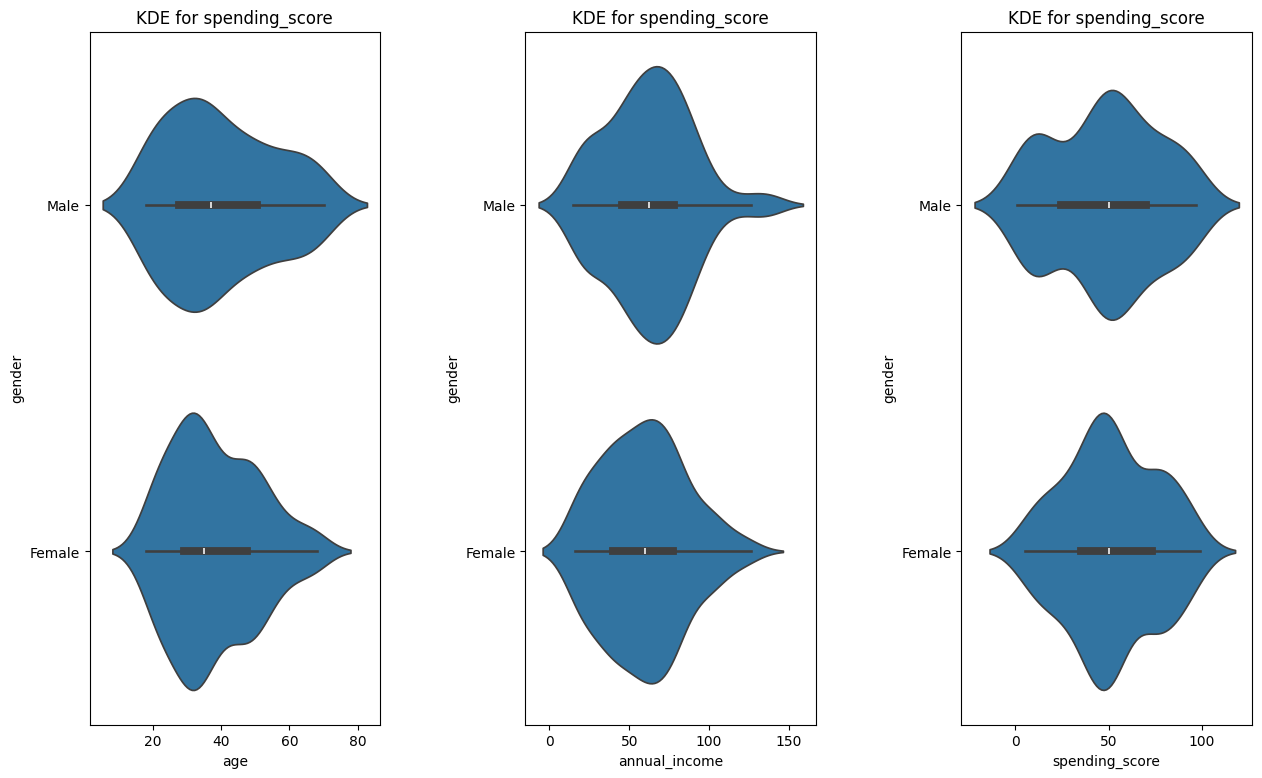

In [22]:
plt.figure(figsize=(15, 9))
n=0
for cols in ['age','annual_income','spending_score']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols,y='gender',data=df)
  plt.title('KDE for {}'.format(x))
plt.show()

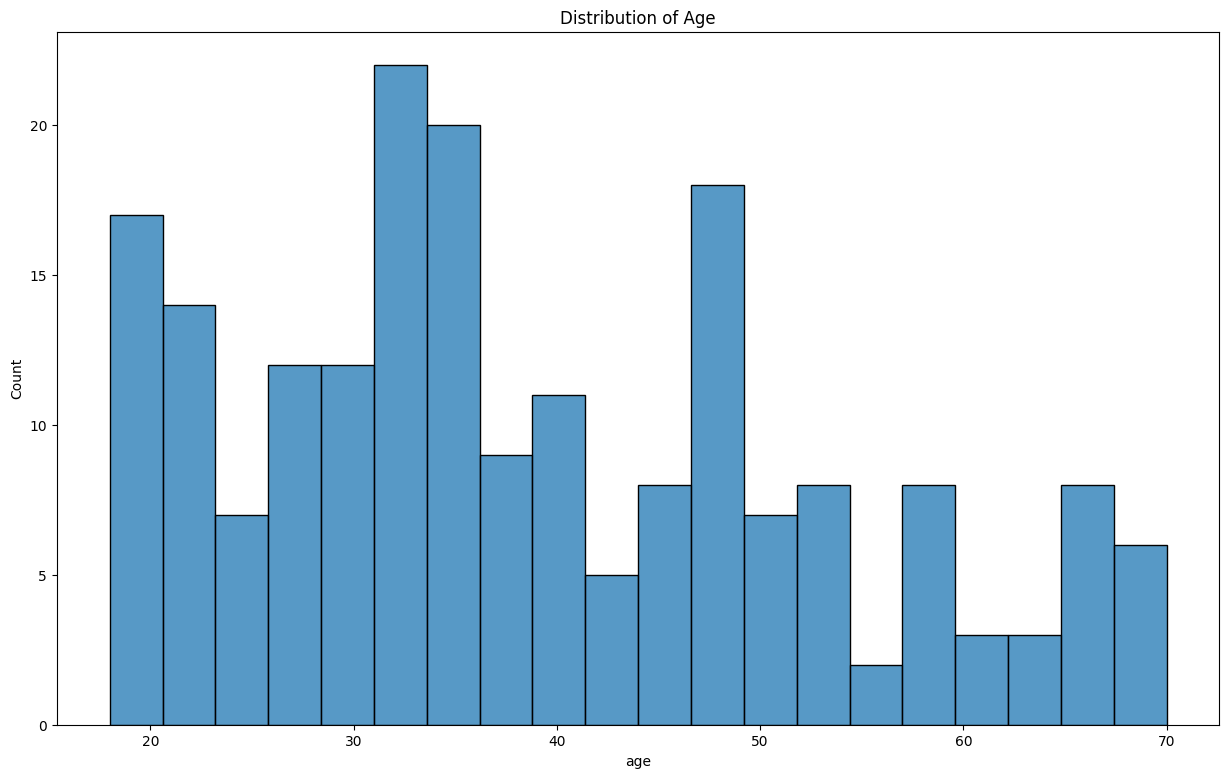

In [23]:
# Histogram to analyze the distribution of age
plt.figure(figsize=(15, 9))
sns.histplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.show()

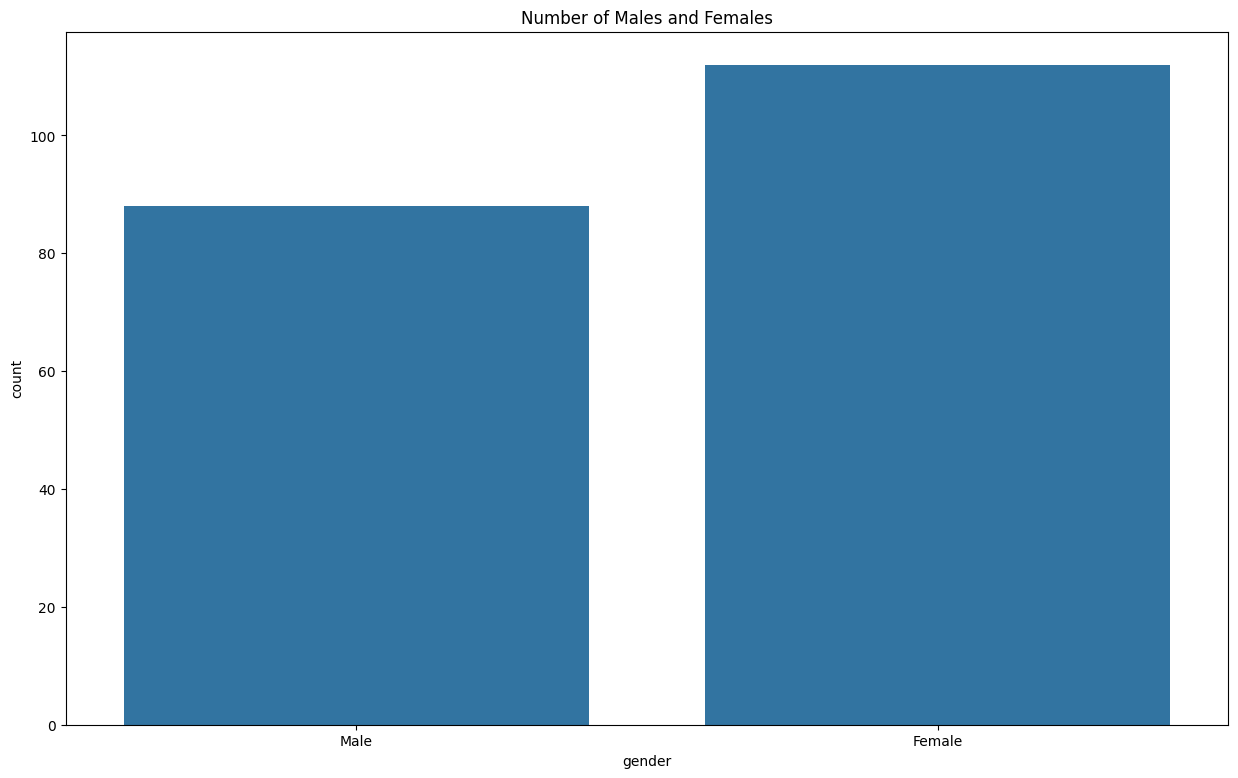

In [24]:
# Bar chart to count the number of males and females
plt.figure(figsize=(15, 9))
sns.countplot(x='gender', data=df)
plt.title('Number of Males and Females')
plt.show()


In [25]:
agw_18_25 = df.age[(df['age'] >= 18) & (df['age'] <= 25)]
agw_26_35 = df.age[(df['age'] >= 26) & (df['age'] <= 35)]
age_36_45 = df.age[(df['age'] >= 36) & (df['age'] <= 45)]
age_46_55 = df.age[(df['age'] >= 46) & (df['age'] <= 55)]
agw_55 = df.age[df['age'] >= 56]

In [26]:
agex = ['18-25','26-35','36-45','46-55','55+']
agey = [len(agw_18_25.values),len(agw_26_35.values),len(age_36_45.values),len(age_46_55.values),len(agw_55.values)]

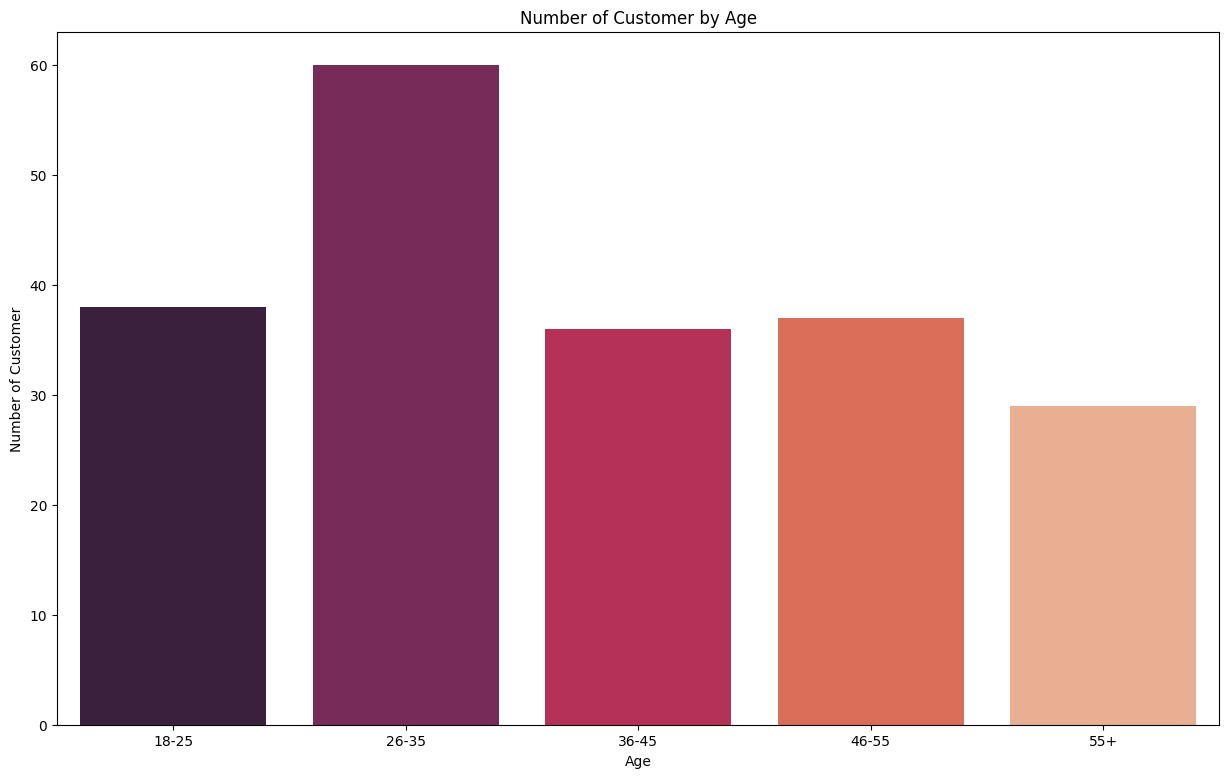

In [27]:
plt.figure(figsize=(15, 9))
sns.barplot(x=agex,y=agey,palette='rocket')
plt.title('Number of Customer by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

<Figure size 1500x900 with 0 Axes>

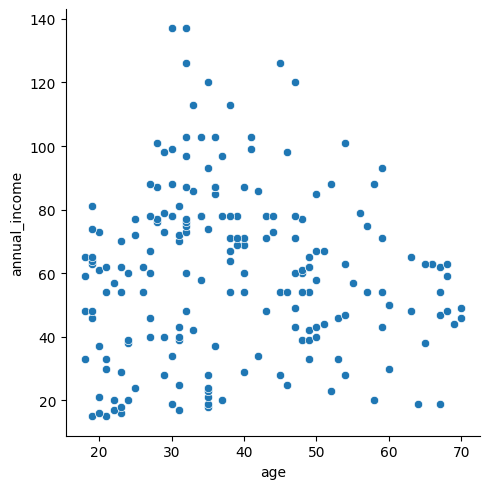

In [28]:
plt.figure(figsize=(15, 9))
sns.relplot(x='age',y='annual_income',data=df)
plt.show()


<Figure size 1500x900 with 0 Axes>

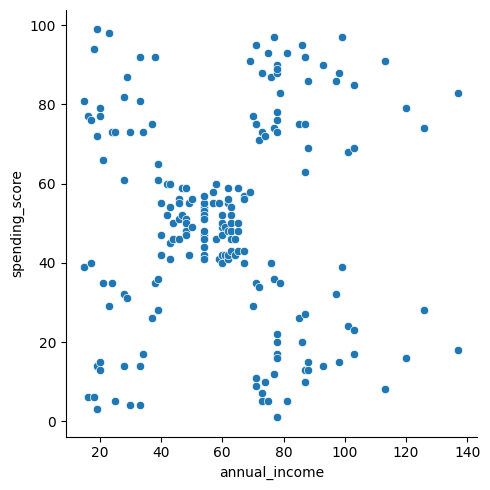

In [29]:
plt.figure(figsize=(15, 9))
sns.relplot(x='annual_income',y='spending_score',data=df)
plt.show()

In [30]:
ss_1_20 = df['spending_score'][(df['spending_score'] >= 1) & (df['spending_score'] <= 20)]
ss_21_40 = df['spending_score'][(df['spending_score'] >= 21) & (df['spending_score'] <= 40)]
ss_41_60 = df['spending_score'][(df['spending_score'] >= 41) & (df['spending_score'] <= 60)]
ss_61_80 = df['spending_score'][(df['spending_score'] >= 61) & (df['spending_score'] <= 80)]
ss_81_100 = df['spending_score'][(df['spending_score'] >= 81) & (df['spending_score'] <= 100)]

In [31]:
ssx = ['1-20','21-40','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_81_100.values)]

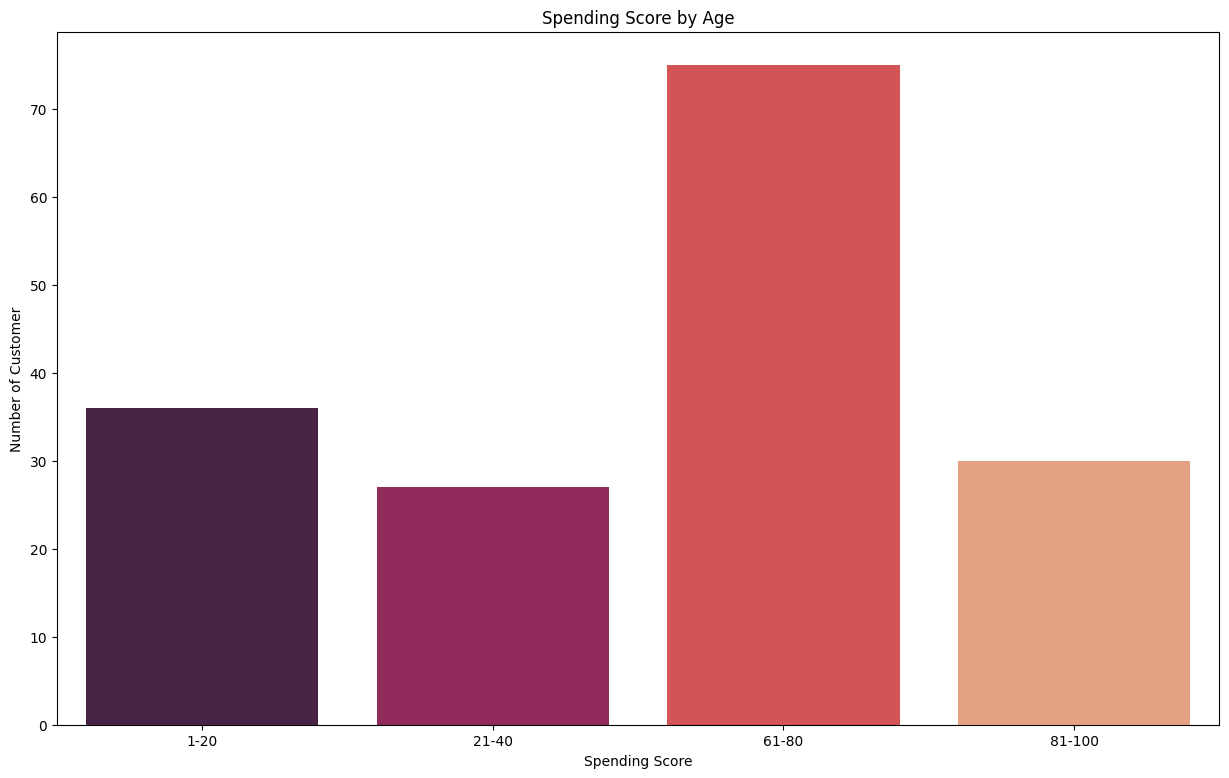

In [32]:
plt.figure(figsize=(15, 9))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Spending Score by Age')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customer')
plt.show()

In [33]:
ai0_30 = df['annual_income'][(df['annual_income'] >= 0) & (df['annual_income'] <= 30)]
ai31_60 = df['annual_income'][(df['annual_income'] >=31) & (df['annual_income'] <= 60)]
ai61_90 = df['annual_income'][(df['annual_income'] >=61) & (df['annual_income'] <= 90)]
ai91_120 = df['annual_income'][(df['annual_income'] >=91) & (df['annual_income'] <= 120)]
ai121_150 = df['annual_income'][(df['annual_income'] >=121) & (df['annual_income'] <= 150)]

axi = ['0-30000','30001-60000','60001-90000','90001-120000','120001-150000']
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

<function matplotlib.pyplot.show(close=None, block=None)>

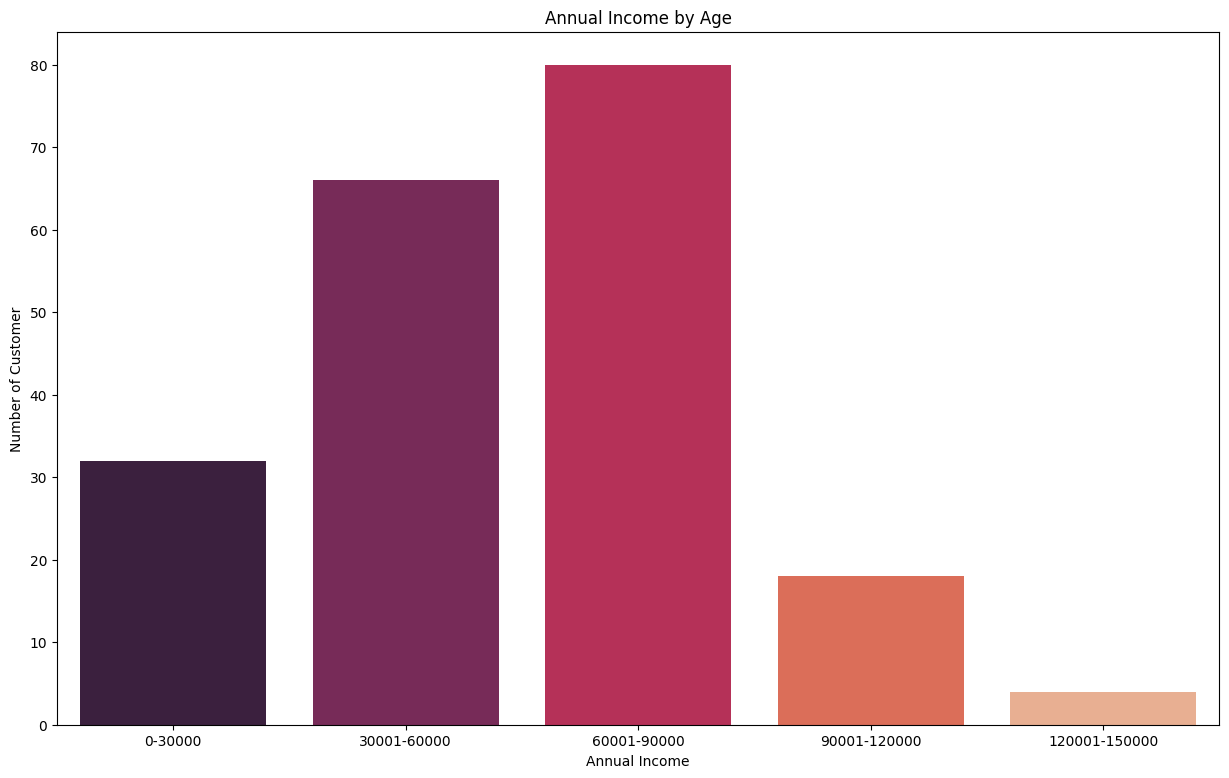

In [34]:
plt.figure(figsize=(15, 9))
sns.barplot(x=axi,y=aiy,palette='rocket')
plt.title('Annual Income by Age')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customer')
plt.show

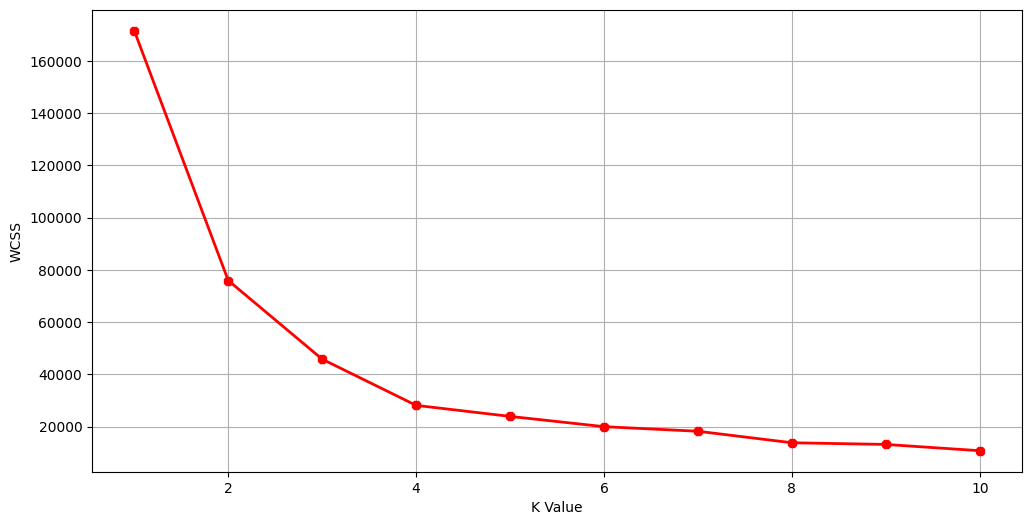

In [35]:
X1 = df.loc[:,['age','spending_score']].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
label = kmeans.fit_predict(X1)
print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [37]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

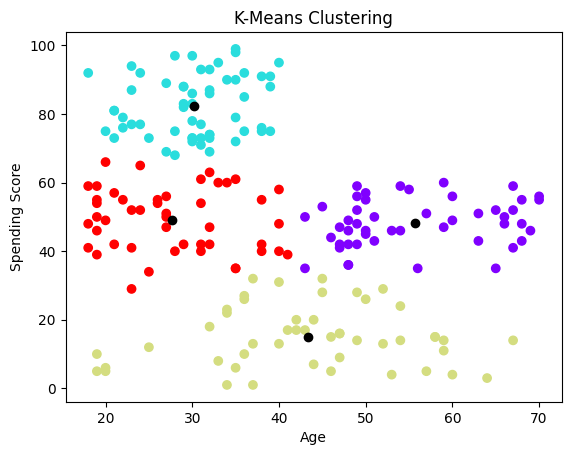

In [38]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt

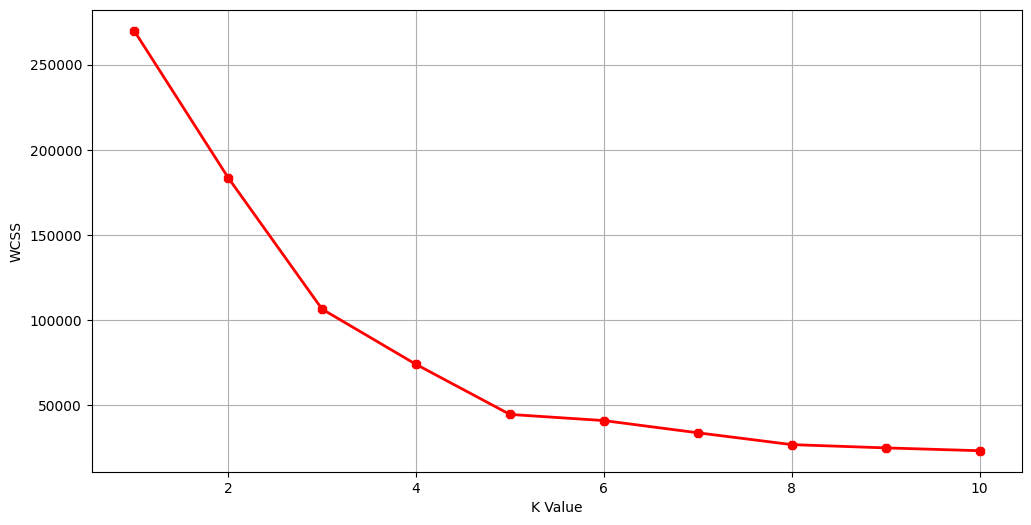

In [39]:
X2 = df.loc[:,['annual_income','spending_score']].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
label = kmeans.fit_predict(X2)
print(label)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [41]:
print(kmeans.cluster_centers_)

[[48.16831683 43.3960396 ]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [87.         18.63157895]]


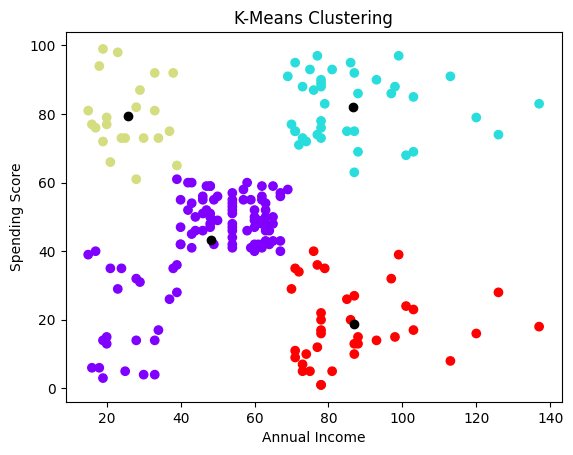

In [42]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

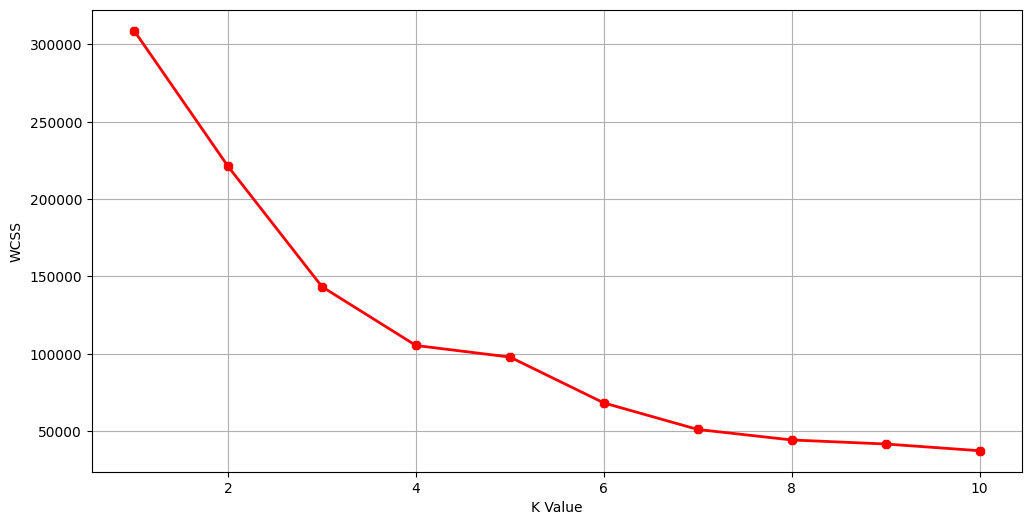

In [43]:
X3 = df.iloc[:,1:]

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=4)
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
label = kmeans.fit_predict(X3)
print(label)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [45]:
print(kmeans.cluster_centers_)

[[44.89473684 48.70526316 42.63157895]
 [32.69230769 86.53846154 82.12820513]
 [24.82142857 28.71428571 74.25      ]
 [40.39473684 87.         18.63157895]]


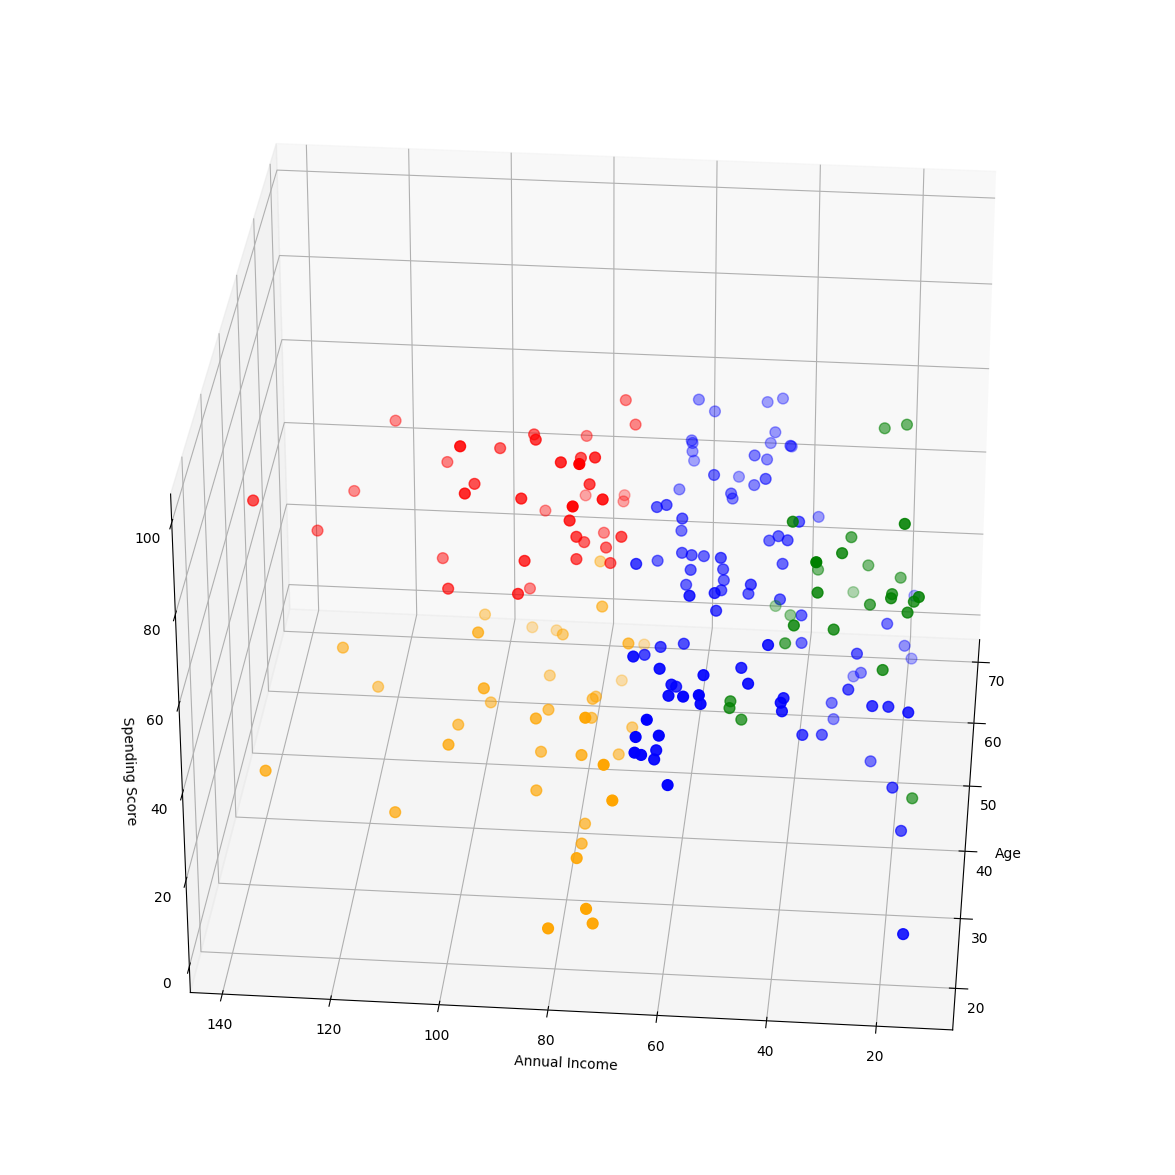

In [46]:
clusters = kmeans.fit_predict(X3)
df['cluster'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.age[df.cluster==0],df['annual_income'][df.cluster==0],df.spending_score[df.cluster==0],c='blue',s=60)
ax.scatter(df.age[df.cluster==1],df['annual_income'][df.cluster==1],df.spending_score[df.cluster==1],c='red',s=60)
ax.scatter(df.age[df.cluster==2],df['annual_income'][df.cluster==2],df.spending_score[df.cluster==2],c='green',s=60)
ax.scatter(df.age[df.cluster==3],df['annual_income'][df.cluster==3],df.spending_score[df.cluster==3],c='orange',s=60)
ax.scatter(df.age[df.cluster==4],df['annual_income'][df.cluster==4],df.spending_score[df.cluster==4],c='yellow',s=60)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

**Project by :-  Gaurav Birari**